# Artificial Intelligence and Human Enhancement Public Opinion
## Introduction
Artificial intelligence is no longer science fiction. From language learning models to machine learning algorithms, these tools are increasingly being used in our daily lives. As we become more familiar with them, the question arises: will we move from enhancing our gadgets to enhancing our own physical bodies?

This short case study aims to explore public opinion on the use of AI for human enhancement. Specifically, we will investigate attitudes towards microchip implants in the brain, which have been proposed as a way to enhance cognitive abilities such as information processing speed and accuracy.

To achieve this objective, we will analyze a dataset obtained from the Pew Research Center, which surveyed a representative sample of U.S. adults between November 1, 2021, and November 7, 2021. We will focus on several columns within the dataset that relate to attitudes towards microchip implants.

The analysis will provide insights into the general sentiment towards this technology and shed light on several key questions, such as whether people would personally want to have a chip implant, how they would feel about its widespread use, and whether they believe it would have positive or negative effects on decision-making and judgment.

By better understanding public opinion on AI and human enhancement, we can inform ethical and policy debates about the use of these technologies and their potential impact on society.

### Data Dictionary
Participants were asked a range of questions and responded using either open-ended text boxes or numbers. Each column header corresponds to a question key and each answer corresponds to an answer key. The questions to be analyzed are as follows:
- BCHIP2: Do you think widespread use of computer chip implants in the brain allowing people to far more quickly and accurately process information would be a…
- BCHIP3: Would you personally want a computer chip implant in the brain, allowing you to far more quickly and accurately process information, if you had the opportunity?
- BCHIP4: If the use of computer chip implants in the brain becomes widespread, allowing people to far more quickly and accurately process information, do you think each of the following would happen?
- BCHIP5: If the use of computer chip implants in the brain becomes widespread, allowing people to far more quickly and accurately process information, which statement better describes how you would feel about this development?
- BCHIP7: If the use of computer chip implants in the brain becomes widespread, allowing people to far more quickly and accurately process information, do you think people’s judgments and decision-making would be…
- BCHIP8: If the use of computer chip implants in the brain becomes widespread, allowing people to far more quickly and accurately process information, do you think it would…
- BCHIP13: Would the use of computer chip implants in the brain be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
- BCHIP14: Computer chip implants in the brain could be used for a number of purposes. Would you favor or oppose the use of computer chips implants in the brain for each of the following purposes?

## Data Cleaning and Preparation

In [1]:
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting seaborn styles.
sns.set_palette('colorblind')
sns.set_style('white')
sns.set(rc={"figure.figsize":(15, 13)})

In [2]:
# Import the .csv and transform it into a pandas dataframe.
atp_df = pd.read_csv('ATP.csv')
atp_df.head(5)

,QKEY,INTERVIEW_START_W99,INTERVIEW_END_W99,DEVICE_TYPE_W99,LANG_W99,FORM_W99,XTABLET_W99,TECH1_W99,SC1_W99,CNCEXC_W99,...,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_INC_SDT1,F_REG,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W99
0,100260,2021-11-03T14:25:27Z,2021-11-03T14:45:34Z,1,1,2,2,NaN,1.0,3,...,NaN,1,1,4,1.0,1,2.0,2,2,0.206396
1,100314,2021-11-04T12:35:35Z,2021-11-04T12:55:29Z,2,1,1,2,1.0,NaN,1,...,NaN,1,2,3,1.0,4,2.0,1,2,0.315090
2,100363,2021-11-03T20:23:43Z,2021-11-03T20:36:24Z,2,1,1,2,1.0,NaN,3,...,NaN,2,3,9,1.0,3,2.0,2,3,0.829579
3,100598,2021-11-02T13:01:05Z,2021-11-04T12:37:42Z,1,1,2,2,NaN,1.0,3,...,NaN,1,1,9,1.0,2,2.0,1,3,0.337527
4,100637,2021-11-02T12:32:58Z,2021-11-02T12:46:23Z,1,1,2,2,NaN,3.0,3,...,1.0,1,1,2,1.0,1,5.0,2,1,1.210606


In [3]:
# Summary statistics
atp_df.describe()

,QKEY,DEVICE_TYPE_W99,LANG_W99,FORM_W99,XTABLET_W99,TECH1_W99,SC1_W99,CNCEXC_W99,EXCITEOE_W99_OE1,EXCITEOE_W99_OE2,...,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_INC_SDT1,F_REG,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W99
count,1.026000e+04,10260.000000,10260.000000,10260.000000,10260.000000,5153.000000,5107.000000,10260.000000,1853.000000,337.000000,...,3755.000000,10260.000000,10260.000000,10260.000000,9864.000000,10260.000000,10087.000000,10260.000000,10260.000000,10260.000000
mean,1.734117e+11,1.649220,1.045029,1.497758,1.983138,2.035901,1.876052,2.617251,24.484620,6.178042,...,7.980826,1.695322,2.638889,9.592982,1.393958,4.416959,1.801527,1.763353,7.180409,1.000000
std,7.021371e+10,0.548153,0.207378,0.500019,0.128759,3.938787,5.995143,5.846544,38.771251,3.404880,...,24.264452,1.253422,1.667072,19.754745,4.747600,12.140269,3.444853,3.496638,21.759111,1.303703
min,1.002600e+05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.004226
25%,2.017017e+11,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.377472
50%,2.018011e+11,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,6.000000,7.000000,...,2.000000,2.000000,3.000000,6.000000,1.000000,3.000000,2.000000,2.000000,2.000000,0.598619
75%,2.019010e+11,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000,3.000000,10.000000,9.000000,...,2.000000,2.000000,4.000000,9.000000,1.000000,4.000000,2.000000,2.000000,3.000000,1.022797
max,2.021010e+11,3.000000,2.000000,2.000000,2.000000,99.000000,99.000000,99.000000,99.000000,11.000000,...,99.000000,9.000000,9.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,8.524234


### Interpretations
- As stated in the data dictionary, specific answers led to specific questions, such as a yes to a question may lead to a question about the yes answer. As a result, some questions have null values.
- Although most questions only have a max number of 3, the max number in some of the columns is 99.

In [4]:
# Getting a count of the highest values for each column.
for column in atp_df.columns:
    max_value = atp_df[column].max()
    count_max = (atp_df[column] == max_value).sum()
    print(f'{column} max value is {max_value} and appears {count_max} times.')

QKEY max value is 202101013477 and appears 1 times.
INTERVIEW_START_W99 max value is 2021-11-07T23:23:15Z and appears 1 times.
INTERVIEW_END_W99 max value is 2021-11-07T23:56:17Z and appears 1 times.
DEVICE_TYPE_W99 max value is 3 and appears 373 times.
LANG_W99 max value is 2 and appears 462 times.
FORM_W99 max value is 2 and appears 5107 times.
XTABLET_W99 max value is 2 and appears 10087 times.
TECH1_W99 max value is 99.0 and appears 8 times.
SC1_W99 max value is 99.0 and appears 19 times.
CNCEXC_W99 max value is 99 and appears 37 times.
EXCITEOE_W99_OE1 max value is 99.0 and appears 287 times.
EXCITEOE_W99_OE2 max value is 11.0 and appears 15 times.
EXCITEOE_W99_OE3 max value is 11.0 and appears 3 times.
EXCITEOE_REFUSED_W99 max value is 99 and appears 278 times.
CONCERNOE_W99_OE1 max value is 99.0 and appears 491 times.
CONCERNOE_W99_OE2 max value is 13.0 and appears 26 times.
CONCERNOE_W99_OE3 max value is 13.0 and appears 4 times.
CONCERNOE_REFUSED_W99 max value is 99 and appear

In [5]:
# Getting all columns and sub-columns related to original columns.
similar_cols = []
col_names = ['BCHIP2', 'BCHIP3', 'BCHIP4', 'BCHIP5', 'BCHIP7', 'BCHIP8', 'BCHIP13', 'BCHIP14']

for name in col_names:
    for col in atp_df.columns:
        if name in col:
            similar_cols.append(col)

In [6]:
chips_df = atp_df[similar_cols]
chips_df.head()

,BCHIP2_W99,BCHIP3_W99,BCHIP4_a_W99,BCHIP4_b_W99,BCHIP4_c_W99,BCHIP4_d_W99,BCHIP5_W99,BCHIP7_W99,BCHIP8_W99,BCHIP13_a_W99,BCHIP13_b_W99,BCHIP14_a_W99,BCHIP14_b_W99,BCHIP14_c_W99,BCHIP14_d_W99
0,3.0,3.0,3.0,2.0,3.0,2.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,2.0,3.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,4.0,2.0,1.0,2.0,3.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2.0,4.0,2.0,1.0,3.0,2.0,2.0,3.0,3.0,1.0,1.0,1.0,1.0,2.0,2.0


## Exploratory Data Analysis
This section will be exploring the questions, and their sub-questions, below. Here, we will be exploring the sentiment among the Pew Research participants towards brain enhancement chips. 
### Questions to Be Explored
- BCHIP2: Do you think widespread use of computer chip implants in the brain allowing people to far more quickly and accurately process information would be a…
- BCHIP3: Would you personally want a computer chip implant in the brain, allowing you to far more quickly and accurately process information, if you had the opportunity?
- BCHIP4: If the use of computer chip implants in the brain becomes widespread, allowing people to far more quickly and accurately process information, do you think each of the following would happen?
- BCHIP5: If the use of computer chip implants in the brain becomes widespread, allowing people to far more quickly and accurately process information, which statement better describes how you would feel about this development?
- BCHIP7: If the use of computer chip implants in the brain becomes widespread, allowing people to far more quickly and accurately process information, do you think people’s judgments and decision-making would be…
- BCHIP8: If the use of computer chip implants in the brain becomes widespread, allowing people to far more quickly and accurately process information, do you think it would…
- BCHIP13: Would the use of computer chip implants in the brain be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
- BCHIP14: Computer chip implants in the brain could be used for a number of purposes. Would you favor or oppose the use of computer chips implants in the brain for each of the following purposes?

### BCHIP2
Question: Do you think widespread use of computer chip implants in the brain allowing people to far more quickly and accurately process information would be a...

Answers:
1. Good idea for society (1)
2. Bad idea for society (2)
3. Not sure (3)

In [7]:
# Filter dataframe by BCHIP2
two_cols = [col for col in chips_df.columns if col.startswith('BCHIP2')]
two_df = chips_df[two_cols]

In [8]:
two_df.head()

,BCHIP2_W99
0,3.0
1,NaN
2,NaN
3,3.0
4,2.0


In [9]:
# Remove instances of 99
two_df = two_df[two_df.BCHIP2_W99 != 99]
two_df.head()

,BCHIP2_W99
0,3.0
1,NaN
2,NaN
3,3.0
4,2.0


In [10]:
two_df.value_counts()

BCHIP2_W99
2.0 2883
3.0 1580
1.0 615
dtype: int64

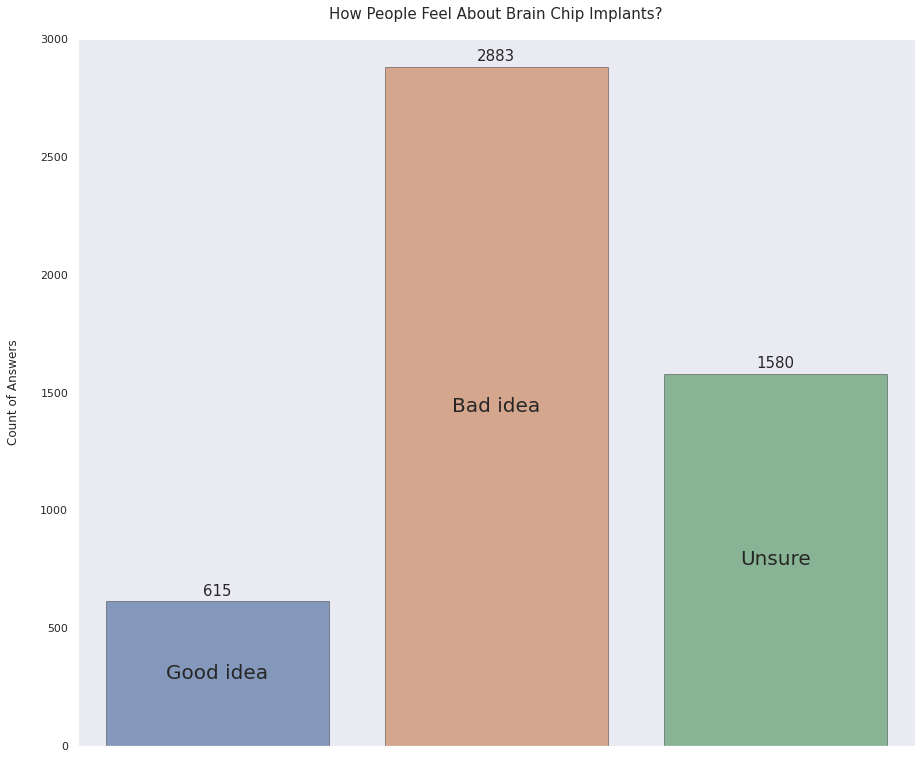

In [11]:
# Creating a countplot of the column
ax_two = sns.countplot(data=two_df, x='BCHIP2_W99')

# Set axis labels and titles
ax_two.set_xlabel("")
ax_two.set_ylabel("Count of Answers", labelpad=20)
ax_two.set_title("How People Feel About Brain Chip Implants?", fontsize=15, pad=20)

# Put the xtick labels on the bars
for p, label in zip(ax_two.patches, ['Good idea', 'Bad idea', 'Unsure']):
    ax_two.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points', size=15)
    ax_two.annotate(label, (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', xytext=(0, 0), 
                    textcoords='offset points', rotation=0, size=20)
    p.set_edgecolor('black')  # add edgecolor to bars for better visibility
    p.set_linewidth(0.5)  # set width of edgecolor line
    p.set_alpha(0.7)  # set transparency of bars
    ax_two.set_xticks([])  # remove xticks
    ax_two.set_xlabel('')  # remove xlabel
    ax_two.tick_params(axis='x', labelsize=15)

# Removing gridlines
ax_two.grid(False)

# Set limit for y-axis
ax_two.set_ylim([0, 3000])

plt.show()

### BCHIP3
Question: Would you personally want a computer chip implant in the brain, allowing you to far more quickly and accurately process information, if you had the opportunity?

Answers:
1. Definitely want (1)
2. Probably want (2)
3. Probably NOT want (3)
4. Definitely NOT want (4)

In [12]:
# Filter dataframe by BCHIP3
three_cols = [col for col in chips_df.columns if col.startswith('BCHIP3')]
three_df = chips_df[three_cols]

In [13]:
# Remove instances of 99
three_df = three_df[three_df.BCHIP3_W99 != 99]
three_df.head()

,BCHIP3_W99
0,3.0
1,NaN
2,NaN
3,4.0
4,4.0


In [14]:
three_df.value_counts()

BCHIP3_W99
4.0 2552
3.0 1493
2.0 719
1.0 276
dtype: int64

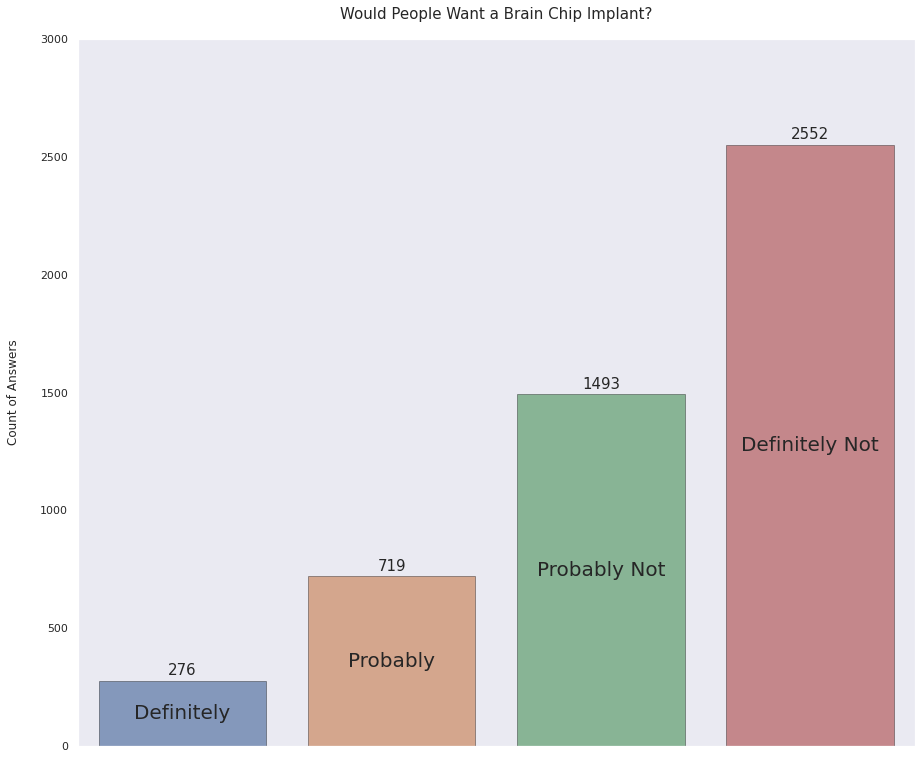

In [15]:
# Create the figure and the plot.

# Creating a countplot of the column
ax_three = sns.countplot(data=three_df, x='BCHIP3_W99')

# Set axis labels and titles
ax_three.set_xlabel("")
ax_three.set_ylabel("Count of Answers", labelpad=20)
ax_three.set_title("Would People Want a Brain Chip Implant?", fontsize=15, pad=20)

# Put the xtick labels on the bars
for p, label in zip(ax_three.patches, ['Definitely', 'Probably', 'Probably Not', 'Definitely Not']):
    ax_three.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points', size=15)
    ax_three.annotate(label, (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', xytext=(0, 0), 
                    textcoords='offset points', rotation=0, size=20)
    p.set_edgecolor('black')  # add edgecolor to bars for better visibility
    p.set_linewidth(0.5)  # set width of edgecolor line
    p.set_alpha(0.7)  # set transparency of bars
    ax_three.set_xticks([])  # remove xticks
    ax_three.set_xlabel('')  # remove xlabel
    ax_three.tick_params(axis='x', labelsize=15)

# Removing gridlines
ax_three.grid(False)

# Set limit for y-axis
ax_three.set_ylim([0, 3000])

plt.show()

### BCHIP4
Question: If the use of computer chip implants in the brain becomes widespread, allowing people to far more quickly and accurately process information, do you think each of the following would happen?
1. People who have these computer chip implants in the brain would be more productive at their jobs
2. These computer chip implants in the brain would be used before we fully understand how they affect people’s health 
3. The use of these computer chip implants in the brain would lead to new innovation and problem solving in society
4. These techniques would go too far eliminating natural differences between people in society

Answers:
1. Definitely want (1)
2. Probably want (2)
3. Probably NOT want (3)
4. Definitely NOT want (4)

In [16]:
# Filter dataframe by BCHIP4
four_cols = [col for col in chips_df.columns if col.startswith('BCHIP4')]
four_df = chips_df[four_cols]

In [17]:
# Remove instances of 99
four_df = four_df[four_df != 99].dropna()
four_df.value_counts()

BCHIP4_a_W99 BCHIP4_b_W99 BCHIP4_c_W99 BCHIP4_d_W99
2.0 2.0 2.0 2.0 689
 1.0 2.0 1.0 300
 2.0 2.0 3.0 251
 1.0 2.0 2.0 220
3.0 1.0 3.0 1.0 189
 ... 
 4.0 1.0 1.0 1
4.0 1.0 1.0 3.0 1
 3.0 4.0 1
 2.0 1.0 2.0 1
2.0 4.0 4.0 4.0 1
Length: 198, dtype: int64

In [18]:
four_df.head()

,BCHIP4_a_W99,BCHIP4_b_W99,BCHIP4_c_W99,BCHIP4_d_W99
0,3.0,2.0,3.0,2.0
3,2.0,1.0,2.0,3.0
4,2.0,1.0,3.0,2.0
7,4.0,1.0,3.0,1.0
9,2.0,1.0,3.0,1.0


In [19]:
four_df['BCHIP4_b_W99'].value_counts()

2.0 2205
1.0 1851
3.0 546
4.0 289
Name: BCHIP4_b_W99, dtype: int64

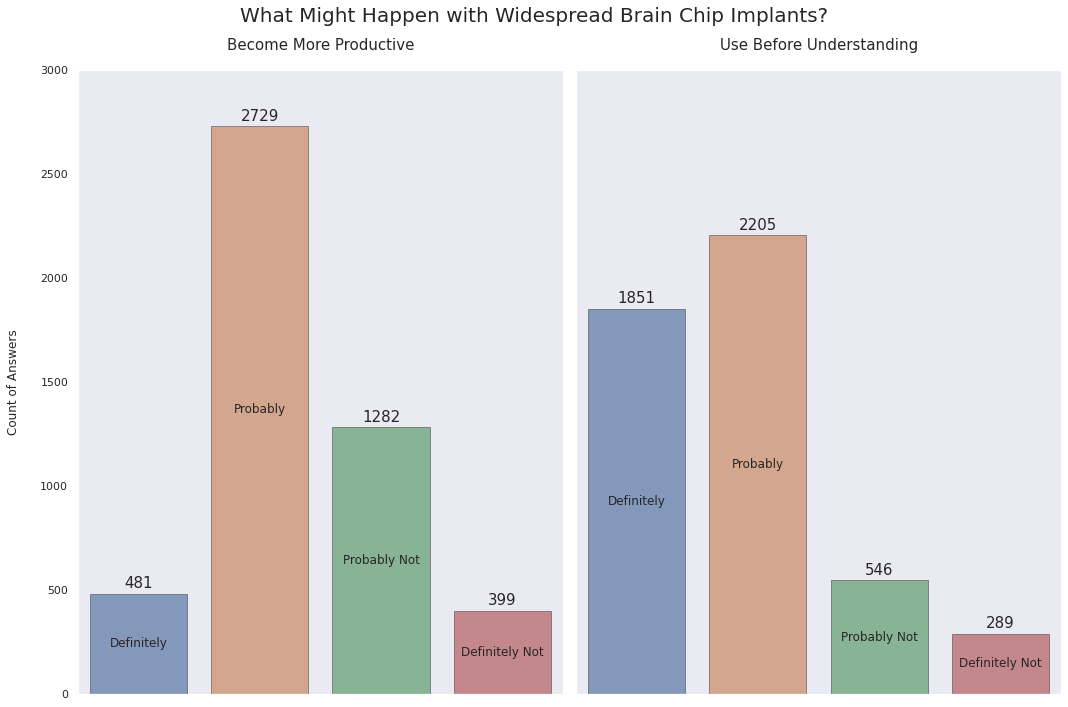

In [20]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Set super title
fig.suptitle('What Might Happen with Widespread Brain Chip Implants?', fontsize=20)

# Iterate through each subplot and create a countplot for each column
for i, col in enumerate(['BCHIP4_a_W99', 'BCHIP4_b_W99']):
    # Creating a countplot of the column
    ax = sns.countplot(data=four_df, x=col, ax=axs[i])
    
    # Set axis labels and titles
    ax.set_xlabel("")
    ax.set_ylabel("Count of Answers", labelpad=20)
    ax.set_title(col.replace('_W99', '').replace('BCHIP4_a', 'Become More Productive')
                 .replace('BCHIP4_b', 'Use Before Understanding'), fontsize=15, pad=20)
    
    # Put the xtick labels on the bars
    for p, label in zip(ax.patches, ['Definitely', 'Probably', 'Probably Not', 'Definitely Not']):
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points', size=15)
        ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', xytext=(0, 0), 
                    textcoords='offset points', rotation=0, size=12)
        p.set_edgecolor('black')  # add edgecolor to bars for better visibility
        p.set_linewidth(0.5)  # set width of edgecolor line
        p.set_alpha(0.7)  # set transparency of bars
        ax.set_xticks([])  # remove xticks
        ax.set_xlabel('')  # remove xlabel
        ax.tick_params(axis='x', labelsize=15)

    # Removing gridlines
    ax.grid(False)

    # Set limit for y-axis
    ax.set_ylim([0, 3000])

# Remove y-axis on the second subplot
axs[1].set_yticks([])
axs[1].set_ylabel('')

# Adjust spacing between subplots
fig.tight_layout()

plt.show()

In [21]:
four_df['BCHIP4_d_W99'].value_counts()

2.0 1982
1.0 1587
3.0 976
4.0 346
Name: BCHIP4_d_W99, dtype: int64

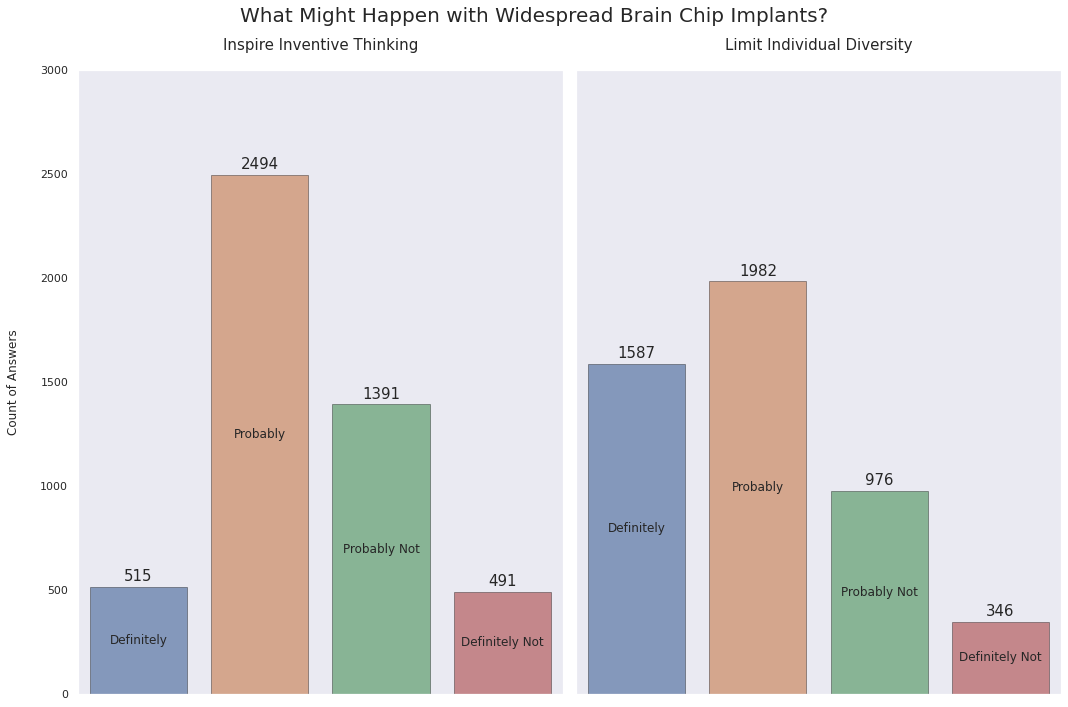

In [22]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Set super title
fig.suptitle('What Might Happen with Widespread Brain Chip Implants?', fontsize=20)

# Iterate through each subplot and create a countplot for each column
for i, col in enumerate(['BCHIP4_c_W99', 'BCHIP4_d_W99']):
    # Creating a countplot of the column
    ax = sns.countplot(data=four_df, x=col, ax=axs[i])
    
    # Set axis labels and titles
    ax.set_xlabel("")
    ax.set_ylabel("Count of Answers", labelpad=20)
    ax.set_title(col.replace('_W99', '').replace('BCHIP4_c', 'Inspire Inventive Thinking')
                 .replace('BCHIP4_d', 'Limit Individual Diversity'), fontsize=15, pad=20)
    
    # Put the xtick labels on the bars
    for p, label in zip(ax.patches, ['Definitely', 'Probably', 'Probably Not', 'Definitely Not']):
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points', size=15)
        ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', xytext=(0, 0), 
                    textcoords='offset points', rotation=0, size=12)
        p.set_edgecolor('black')  # add edgecolor to bars for better visibility
        p.set_linewidth(0.5)  # set width of edgecolor line
        p.set_alpha(0.7)  # set transparency of bars
        ax.set_xticks([])  # remove xticks
        ax.set_xlabel('')  # remove xlabel
        ax.tick_params(axis='x', labelsize=15)

    # Removing gridlines
    ax.grid(False)

    # Set limit for y-axis
    ax.set_ylim([0, 3000])

# Remove y-axis on the second subplot
axs[1].set_yticks([])
axs[1].set_ylabel('')

# Adjust spacing between subplots
fig.tight_layout()

plt.show()

### BCHIP5
Question: If the use of computer chip implants in the brain becomes widespread, allowing people to far more quickly and accurately process information, which statement better describes how you would feel about this development?

Answers:
1. As humans, we are always trying to better ourselves and this idea is no different (1)
2. This idea is meddling with nature and crosses a line we should not cross (2)

In [23]:
# Filter dataframe by BCHIP5
five_cols = [col for col in chips_df.columns if col.startswith('BCHIP5')]
five_df = chips_df[five_cols]

In [24]:
# Remove instances of 99
five_df = five_df[five_df.BCHIP5_W99 != 99]
five_df.value_counts()

BCHIP5_W99
2.0 3252
1.0 1779
dtype: int64

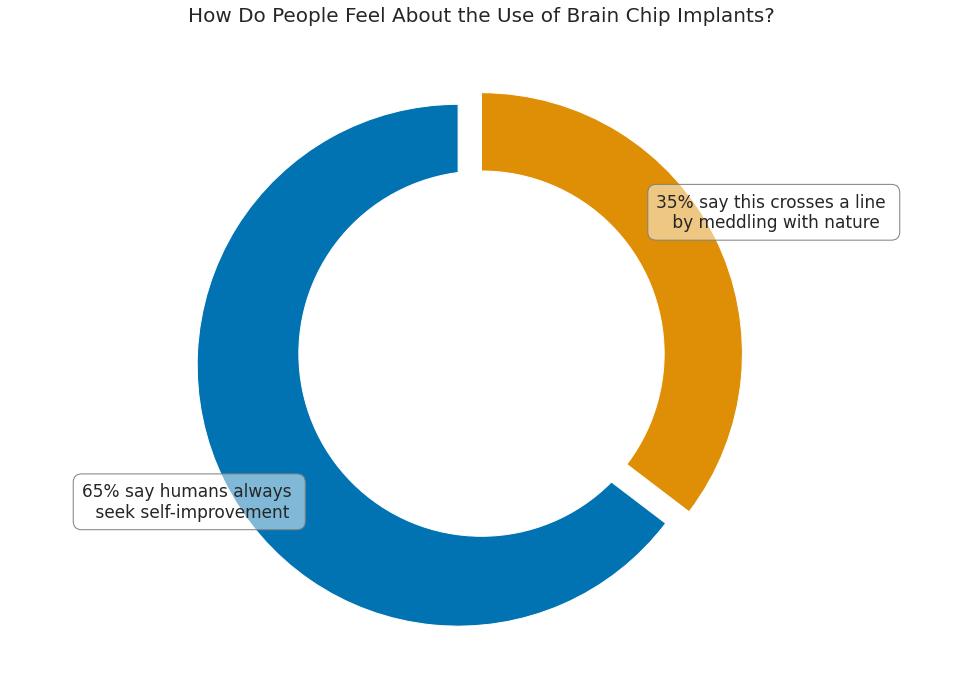

In [25]:
# Creating the sizes and colors
palette = sns.color_palette('colorblind')
sizes = [3252, 1779]
colors = palette[:2]
labels = ['65% say humans always \n seek self-improvement', '35% say this crosses a line \n by meddling with nature']

# Create the donut chart
fig, ax = plt.subplots()
fig.set_size_inches(17, 12)
ax.axis('equal')
wedges, texts, autotexts = ax.pie(sizes, colors=colors, startangle=90, pctdistance=0.85, explode=(0.1, 0), autopct='', textprops={'fontsize': 15, 'ha': 'center', 'va': 'center'})

# Add labels to the donut chart
for i, wedge in enumerate(wedges):
    # Calculate the angle for the wedge
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    # Convert the angle to radians
    angle_rad = angle / 180. * np.pi
    # Calculate the distance from the center of the chart for the label text
    distance = 1.1 + 0.15*(i==0) # add extra distance for the first label to center it
    # Calculate the position for the label
    x = np.cos(angle_rad) * distance
    y = np.sin(angle_rad) * distance
    # Set the text for the label
    label_text = labels[i]
    # Create the label with a line pointing to it
    ax.annotate(label_text, xy=(np.cos(angle_rad), np.sin(angle_rad)), xytext=(np.cos(angle_rad)*1.25, np.sin(angle_rad)*1.25),
                fontsize=17, ha='center', va='center_baseline', 
                bbox=dict(boxstyle='round', pad=0.5, facecolor=(1.0, 1.0, 1.0, 0.5), edgecolor='gray'))



# Create the donut hole
my_circle = plt.Circle((0,0), 0.70, color='white')
fig = plt.gcf()
fig.gca().add_artist(my_circle)

# Increase font sizes
plt.title('How Do People Feel About the Use of Brain Chip Implants?', fontsize=20)
plt.setp(texts, size=20)

# Show the chart
plt.show()

### BCHIP7
Question: If the use of computer chip implants in the brain becomes widespread, allowing people to far more quickly and accurately process information, do you think people’s judgments and decision-making would be

Answers:
1. Better than now (1)
2. Worse than now (2)
3. About the same as now (3)

In [26]:
# Filter dataframe by BCHIP7
seven_cols = [col for col in chips_df.columns if col.startswith('BCHIP7')]
seven_df = chips_df[seven_cols]

# Remove instances of 99
seven_df = seven_df[seven_df != 99].dropna()
seven_df.value_counts()

BCHIP7_W99
3.0 2169
2.0 1566
1.0 1228
dtype: int64

In [27]:
seven_df.head()

,BCHIP7_W99
0,2.0
3,3.0
4,3.0
7,2.0
9,2.0


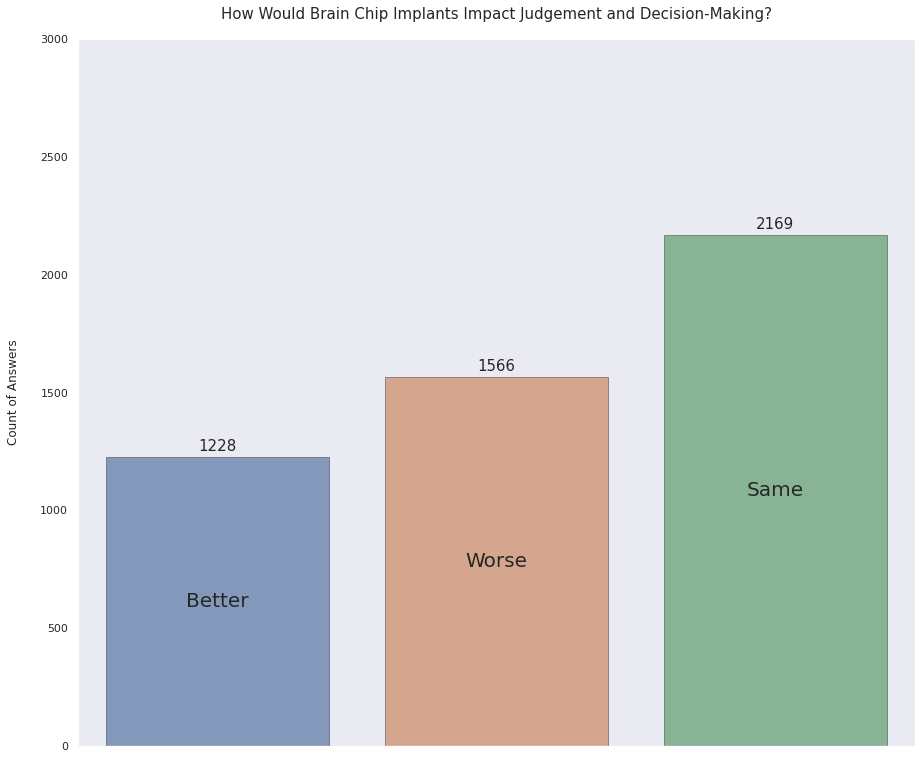

In [28]:
# Creating a countplot of the column
ax_seven = sns.countplot(data=seven_df, x='BCHIP7_W99')

# Set axis labels and titles
ax_seven.set_xlabel("")
ax_seven.set_ylabel("Count of Answers", labelpad=20)
ax_seven.set_title("How Would Brain Chip Implants Impact Judgement and Decision-Making?", fontsize=15, pad=20)

# Put the xtick labels on the bars
for p, label in zip(ax_seven.patches, ['Better', 'Worse', 'Same']):
    ax_seven.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points', size=15)
    ax_seven.annotate(label, (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', xytext=(0, 0), 
                    textcoords='offset points', rotation=0, size=20)
    p.set_edgecolor('black')  # add edgecolor to bars for better visibility
    p.set_linewidth(0.5)  # set width of edgecolor line
    p.set_alpha(0.7)  # set transparency of bars
    ax_seven.set_xticks([])  # remove xticks
    ax_seven.set_xlabel('')  # remove xlabel
    ax_seven.tick_params(axis='x', labelsize=15)

# Removing gridlines
ax_seven.grid(False)

# Set limit for y-axis
ax_seven.set_ylim([0, 3000])

plt.show()

### BCHIP8
Question: If the use of computer chip implants in the brain becomes widespread, allowing people to far more quickly and accurately process information, do you think it would

Answers:
1. Increase the gap between higher and lower-income Americans (1)
2. Decrease the gap between higher and lower-income Americans (2)
3. Not make much difference (3)

In [29]:
# Filter dataframe by BCHIP8
eight_cols = [col for col in chips_df.columns if col.startswith('BCHIP8')]
eight_df = chips_df[eight_cols]

# Remove instances of 99
eight_df = eight_df[eight_df != 99].dropna()
eight_df.value_counts()

BCHIP8_W99
1.0 3083
3.0 1422
2.0 484
dtype: int64

In [30]:
eight_df.head()

,BCHIP8_W99
0,3.0
3,1.0
4,3.0
7,1.0
9,1.0


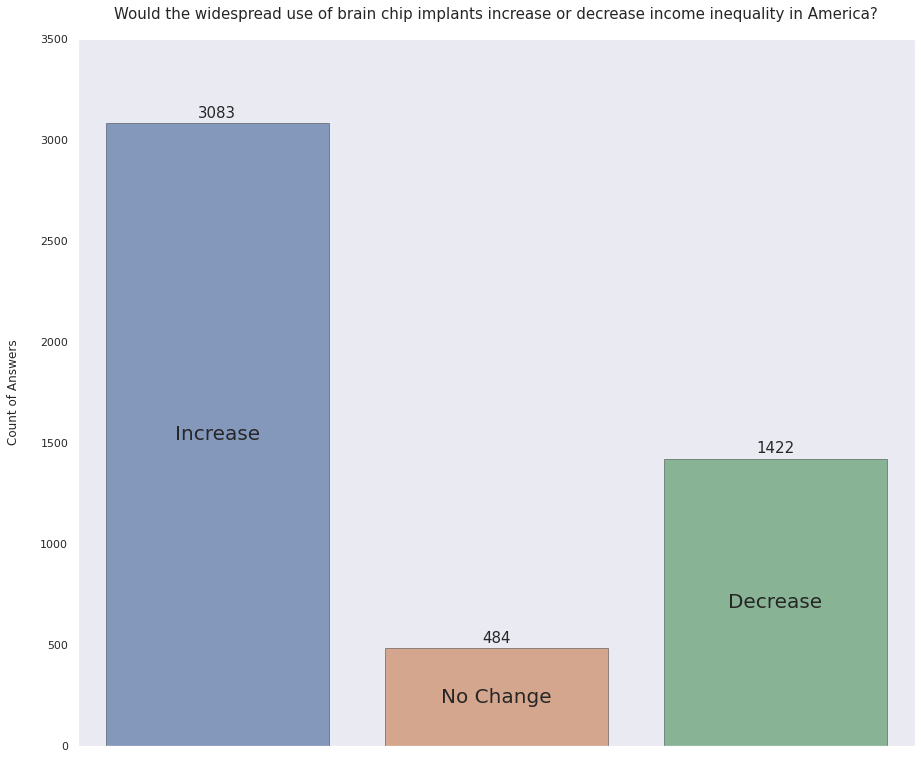

In [31]:
# Creating a countplot of the column
ax_eight = sns.countplot(data=eight_df, x='BCHIP8_W99')

# Set axis labels and titles
ax_eight.set_xlabel("")
ax_eight.set_ylabel("Count of Answers", labelpad=20)
ax_eight.set_title("Would the Widespread Use of Brain Chip Implants Increase or Decrease Income Inequality in America?", fontsize=15, pad=20)

# Put the xtick labels on the bars
for p, label in zip(ax_eight.patches, ['Increase', 'No Change', 'Decrease']):
    ax_eight.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points', size=15)
    ax_eight.annotate(label, (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', xytext=(0, 0), 
                    textcoords='offset points', rotation=0, size=20)
    p.set_edgecolor('black')  # add edgecolor to bars for better visibility
    p.set_linewidth(0.5)  # set width of edgecolor line
    p.set_alpha(0.7)  # set transparency of bars
    ax_eight.set_xticks([])  # remove xticks
    ax_eight.set_xlabel('')  # remove xlabel
    ax_eight.tick_params(axis='x', labelsize=15)

# Removing gridlines
ax_eight.grid(False)

# Set limit for y-axis
ax_eight.set_ylim([0, 3500])

plt.show()

### BCHIP13
Question: Would the use of computer chip implants in the brain be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
1. If people could turn on and off the effects
2. If it could be put in place without surgery 

Answers:
1. More acceptable (1)
2. Less acceptable (2)
3. No difference (3)

In [32]:
# Filter dataframe by BCHIP13
thirteen_cols = [col for col in chips_df.columns if col.startswith('BCHIP13')]
thirteen_df = chips_df[thirteen_cols]

# Remove instances of 99
thirteen_df = thirteen_df[thirteen_df != 99].dropna()
thirteen_df.value_counts()

BCHIP13_a_W99 BCHIP13_b_W99
1.0 1.0 2545
3.0 3.0 1300
1.0 3.0 514
3.0 1.0 208
2.0 2.0 165
 1.0 96
1.0 2.0 88
2.0 3.0 57
3.0 2.0 37
dtype: int64

In [33]:
thirteen_df.head()

,BCHIP13_a_W99,BCHIP13_b_W99
0,1.0,1.0
3,1.0,1.0
4,1.0,1.0
7,2.0,2.0
9,1.0,1.0


In [34]:
thirteen_df['BCHIP13_b_W99'].value_counts()

1.0 2849
3.0 1871
2.0 290
Name: BCHIP13_b_W99, dtype: int64

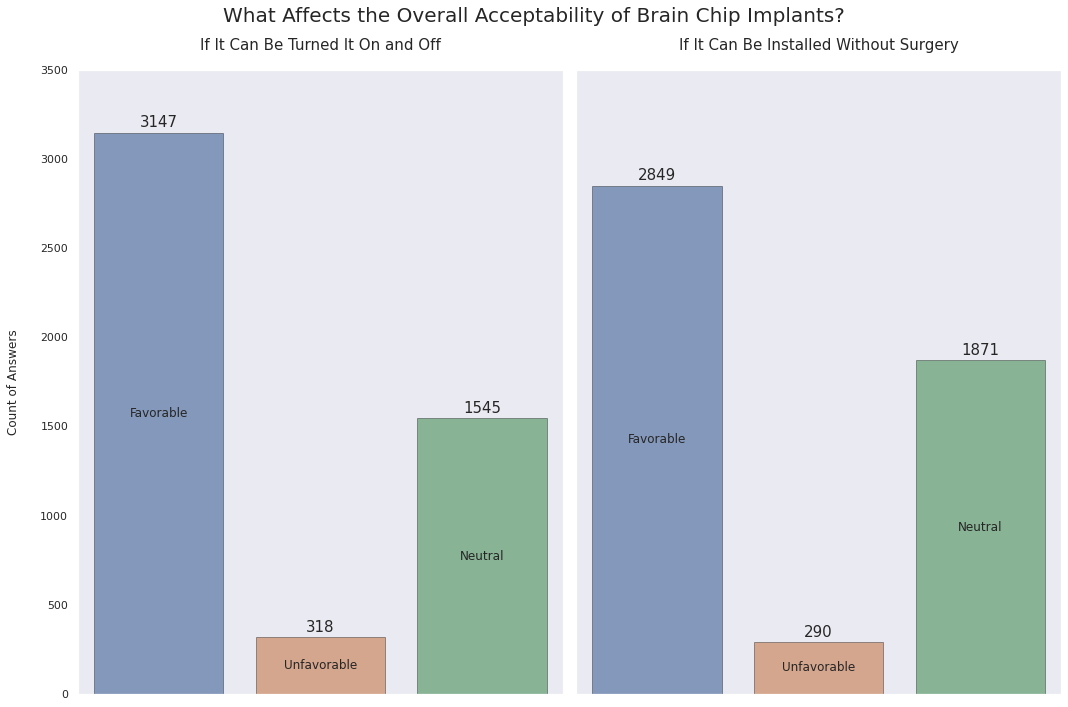

In [35]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Set super title
fig.suptitle('What Affects the Overall Acceptability of Brain Chip Implants?', fontsize=20)

# Iterate through each subplot and create a countplot for each column
for i, col in enumerate(['BCHIP13_a_W99', 'BCHIP13_b_W99']):
    # Creating a countplot of the column
    ax = sns.countplot(data=thirteen_df, x=col, ax=axs[i])
    
    # Set axis labels and titles
    ax.set_xlabel("")
    ax.set_ylabel("Count of Answers", labelpad=20)
    ax.set_title(col.replace('_W99', '').replace('BCHIP13_a', 'If It Can Be Turned It On and Off')
                 .replace('BCHIP13_b', 'If It Can Be Installed Without Surgery'), fontsize=15, pad=20)
    
    # Put the xtick labels on the bars
    for p, label in zip(ax.patches, ['Favorable', 'Unfavorable', 'Neutral']):
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points', size=15)
        ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', xytext=(0, 0), 
                    textcoords='offset points', rotation=0, size=12)
        p.set_edgecolor('black')  # add edgecolor to bars for better visibility
        p.set_linewidth(0.5)  # set width of edgecolor line
        p.set_alpha(0.7)  # set transparency of bars
        ax.set_xticks([])  # remove xticks
        ax.set_xlabel('')  # remove xlabel
        ax.tick_params(axis='x', labelsize=15)

    # Removing gridlines
    ax.grid(False)

    # Set limit for y-axis
    ax.set_ylim([0, 3500])

# Remove y-axis on the second subplot
axs[1].set_yticks([])
axs[1].set_ylabel('')

# Adjust spacing between subplots
fig.tight_layout()

plt.show()

### BCHIP14
Question: Computer chip implants in the brain could be used for a number of purposes. Would you favor or oppose the use of computer chips implants in the brain for each of the following purposes?
1. To treat age-related decline in mental abilities
2. To allow increased movement for people who are paralyzed 
3. To make it possible for thoughts in the brain to search content on the internet without typing
4. To translate thoughts in the brain, without speaking, into text on a screen

Answers:
1. Favor (1)
2. Oppose (2)
3. Not sure (3)

In [36]:
# Filter dataframe by BCHIP14
fourteen_cols = [col for col in chips_df.columns if col.startswith('BCHIP14')]
fourteen_df = chips_df[fourteen_cols]

# Remove instances of 99
fourteen_df = fourteen_df[fourteen_df != 99].dropna()
fourteen_df.value_counts()

BCHIP14_a_W99 BCHIP14_b_W99 BCHIP14_c_W99 BCHIP14_d_W99
1.0 1.0 1.0 1.0 976
 2.0 2.0 739
 3.0 3.0 605
 1.0 329
3.0 3.0 3.0 3.0 260
 ... 
1.0 2.0 3.0 2.0 1
 1.0 3.0 1
2.0 1.0 1.0 3.0 1
1.0 3.0 1.0 1.0 1
2.0 2.0 1.0 3.0 1
Length: 69, dtype: int64

In [37]:
fourteen_df.head()

,BCHIP14_a_W99,BCHIP14_b_W99,BCHIP14_c_W99,BCHIP14_d_W99
0,1.0,1.0,2.0,3.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,2.0,2.0
7,2.0,3.0,2.0,2.0
9,1.0,1.0,2.0,2.0


In [45]:
fourteen_df['BCHIP14_b_W99'].value_counts()

1.0 4186
3.0 546
2.0 298
Name: BCHIP14_b_W99, dtype: int64

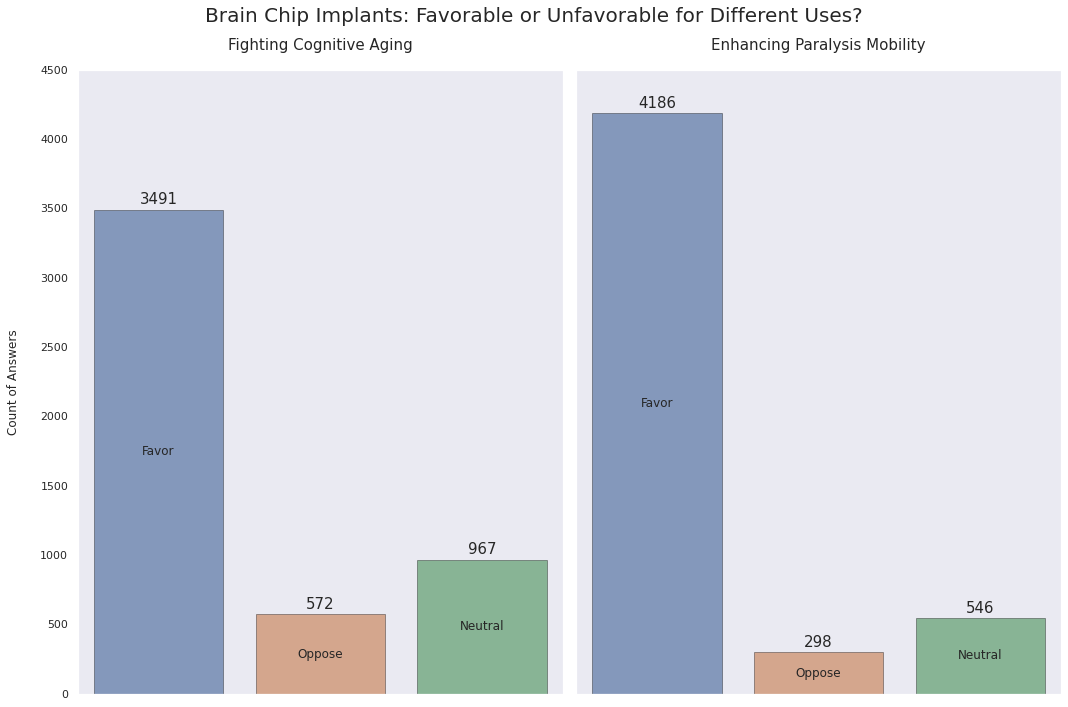

In [51]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Set super title
fig.suptitle('Brain Chip Implants: Favorable or Unfavorable for Different Uses?', fontsize=20)

# Iterate through each subplot and create a countplot for each column
for i, col in enumerate(['BCHIP14_a_W99', 'BCHIP14_b_W99']):
    # Creating a countplot of the column
    ax = sns.countplot(data=fourteen_df, x=col, ax=axs[i])
    
    # Set axis labels and titles
    ax.set_xlabel("")
    ax.set_ylabel("Count of Answers", labelpad=20)
    ax.set_title(col.replace('_W99', '').replace('BCHIP14_a', 'Fighting Cognitive Aging')
                 .replace('BCHIP14_b', 'Enhancing Paralysis Mobility'), fontsize=15, pad=20)
    
    # Put the xtick labels on the bars
    for p, label in zip(ax.patches, ['Favor', 'Oppose', 'Neutral']):
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points', size=15)
        ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', xytext=(0, 0), 
                    textcoords='offset points', rotation=0, size=12)
        p.set_edgecolor('black')  # add edgecolor to bars for better visibility
        p.set_linewidth(0.5)  # set width of edgecolor line
        p.set_alpha(0.7)  # set transparency of bars
        ax.set_xticks([])  # remove xticks
        ax.set_xlabel('')  # remove xlabel
        ax.tick_params(axis='x', labelsize=15)

    # Removing gridlines
    ax.grid(False)

    # Set limit for y-axis
    ax.set_ylim([0, 4500])

# Remove y-axis on the second subplot
axs[1].set_yticks([])
axs[1].set_ylabel('')

# Adjust spacing between subplots
fig.tight_layout()

plt.show()

In [49]:
fourteen_df['BCHIP14_d_W99'].value_counts()

2.0 1747
1.0 1695
3.0 1588
Name: BCHIP14_d_W99, dtype: int64

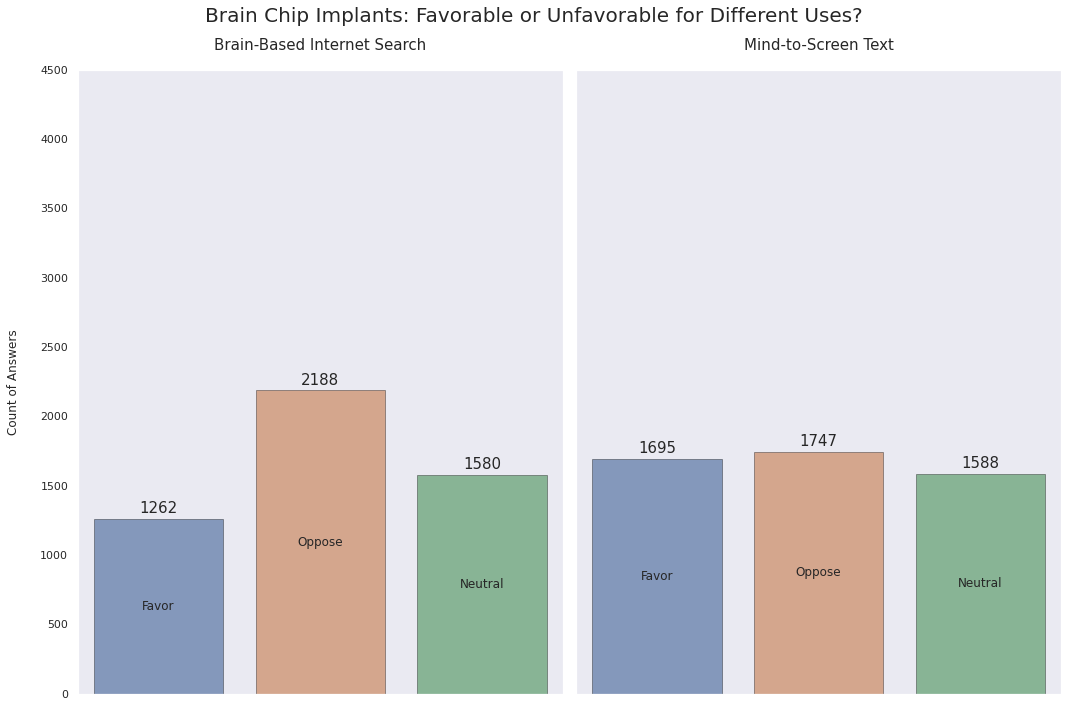

In [50]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Set super title
fig.suptitle('Brain Chip Implants: Favorable or Unfavorable for Different Uses?', fontsize=20)

# Iterate through each subplot and create a countplot for each column
for i, col in enumerate(['BCHIP14_c_W99', 'BCHIP14_d_W99']):
    # Creating a countplot of the column
    ax = sns.countplot(data=fourteen_df, x=col, ax=axs[i])
    
    # Set axis labels and titles
    ax.set_xlabel("")
    ax.set_ylabel("Count of Answers", labelpad=20)
    ax.set_title(col.replace('_W99', '').replace('BCHIP14_c', 'Brain-Based Internet Search')
                 .replace('BCHIP14_d', 'Mind-to-Screen Text'), fontsize=15, pad=20)
    
    # Put the xtick labels on the bars
    for p, label in zip(ax.patches, ['Favor', 'Oppose', 'Neutral']):
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points', size=15)
        ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', xytext=(0, 0), 
                    textcoords='offset points', rotation=0, size=12)
        p.set_edgecolor('black')  # add edgecolor to bars for better visibility
        p.set_linewidth(0.5)  # set width of edgecolor line
        p.set_alpha(0.7)  # set transparency of bars
        ax.set_xticks([])  # remove xticks
        ax.set_xlabel('')  # remove xlabel
        ax.tick_params(axis='x', labelsize=15)

    # Removing gridlines
    ax.grid(False)

    # Set limit for y-axis
    ax.set_ylim([0, 4500])

# Remove y-axis on the second subplot
axs[1].set_yticks([])
axs[1].set_ylabel('')

# Adjust spacing between subplots
fig.tight_layout()

plt.show()

## Results and Conclusions
### Introduction
The objective of this study was to explore public opinion on the use of AI for human enhancement, with a specific focus on attitudes towards microchip implants in the brain. In order to gain insights into the sentiments of the public, this study utilized survey results obtained from a Pew Research study on public sentiment toward artificial intelligence. The following questions were analyzed to understand public sentiment toward brain chip enhancement: BCHIP2, BCHIP3, BCHIP4, BCHIP5, BCHIP7, BCHIP8, BCHIP13, and BCHIP14. The results and conclusions of this study provide valuable insights into the general perceptions, concerns, and potential implications of brain enhancement technology.

### Findings
The question of whether widespread use of computer chip implants in the brain for faster and accurate information processing would be good or bad for society was posed in BCHIP2 question. Results showed that 2883 participants thought it would be a bad idea, 1580 were unsure, and only 615 thought it would be good. This indicates a predominantly negative sentiment towards brain chip enhancements with a leaning towards apathy, possibly due to concerns over privacy, ethics, manipulation and control, inequality, playing god, and a lack of general understanding. Technical individuals may also fear neurohacking.

BCHIP3 asked if people would want a computer chip implant in their brain to process information faster and more accurately. 2552 definitely didn't want it, 1493 probably didn't want it, 719 probably did, and 276 definitely did. The mainly negative response could be due to fear of physical installation, biological concerns, and religious and philosophical beliefs against brain chip enhancements, regardless of potential benefits.

BCHIP4 explores four potential scenarios that could happen if computer chip implants become widespread. The first scenario, where people become more productive, received the second most positive sentiment. The second scenario, where people use the enhancements before understanding them, received the most positive sentiment, possibly due to cynicism toward new technology and pressure to succeed. The third scenario, where the implants inspire inventive thinking, received the highest count of "probably not" due to the potential loss of individuality and unique ideas. The final scenario, where the implants limit diversity, received mixed responses possibly due to systemic racism and the lack of established classes on the topic.

In response to BCHIP5, 65% of respondents showed positive sentiment towards the idea of using computer chip implants in the brain for self-improvement, while 35% believed it was crossing a line by meddling with nature. The negative sentiment towards the technology may be due to religious beliefs, fear of the unknown, concerns about inequality, or philosophical objections.

BCHIP7 shows that the public is divided on how brain chip implants would impact judgment and decision making, with 2169 respondents saying it would have no effect, 1566 saying it would worsen them, and 1228 saying it would improve them. Many believe it would have no effect because the technology is not fully understood and there is hope for the ability to ignore the implant's suggestions.

The majority of respondents (3083) from BCHIP8 believe that the widespread use of brain chip implants would increase income inequality in America, while 1422 respondents think it would decrease it, and 484 believe there would be no change. The reason for the belief that it would increase inequality may be due to the potential cost of the implant, which could create an unfair advantage for those with higher incomes. It could also make it easier for those with higher incomes to automate their jobs, and the use of the implant for monitoring behavior could lead to discrimination against those with lower incomes.

In BCHIP13, respondents were asked about the acceptability of certain circumstances. 3147 respondents found it favorable if the implant could be turned on or off, 1545 were neutral, and 318 found it unfavorable. Meanwhile, 2849 respondents saw it as favorable if the implant could be installed without surgery, 1871 were neutral, and 290 found it unfavorable. Respondents tended toward neutrality when considering the circumstance of having a brain chip installed without surgery, possibly due to the risks associated with the procedure. Conversely, people were more comfortable with the idea of being able to control the chip, such as by being able to turn it on and off.

BCHIP14 showed that the public generally favors the use of computer chip implants in the brain for fighting cognitive aging and enhancing paralysis mobility, while there is more opposition to using them for brain-based internet search and mind-to-screen text. The former are viewed as having potential societal benefits and improving quality of life for those with disabilities, while the latter are seen as invasive and risky.

### Interpretations in Relation to the Objective
The objective of the study was to explore public opinion on the use of AI for human enhancement, specifically investigating attitudes towards microchip implants in the brain. The data shows that the general public sentiment towards brain enhancement chips is primarily negative, with concerns about the potential risks and consequences of meddling with nature. However, if the focus is on the human-creator aspect of the chips, the sentiment is 65% positive. Additionally, people are more in favor of using brain enhancement chips to improve the quality of life for the disabled. The data also reveals mixed and negative sentiment towards the use of brain enhancement chips for non-essential purposes such as mind-to-screen text. It is notable that the public seems to view a future with brain enhancement chips in a more dystopian light, likely due to concerns about the potential negative consequences of such technology, as seen with previous technological advancements. 

## Limitations and Future Work
### Limitations
There are some limitations to this data analysis that need to be considered. The dataset was obtained from Pew Research, and while it is a reputable source, it is limited to a sample of the U.S. population, so the findings may not be generalizable to other populations around the world. Additionally, the wording of the questions may have been difficult to understand for some subsets of the population, which could affect the accuracy of the results. Another potential limitation is that the survey was lengthy, which may have caused some respondents to not answer all of the questions. Finally, non-response bias may have also affected the results, as those who chose not to respond to the survey may have different attitudes towards brain enhancement chips than those who did respond.

### Suggestions for Future Research
There are a few areas that future research on the topic of brain chip enhancements could focus on. First, it would be valuable to explore how different demographic groups view the use of brain chip enhancements. This could include examining how race, religion, and other factors may shape people's opinions. Another avenue for future research would be to conduct a world-wide survey to obtain a more comprehensive understanding of public sentiment on this issue. With a more diverse sample, researchers may be able to identify cultural factors that shape people's views on brain chip enhancements, which could be important for policymakers and other stakeholders to consider.

# Conclusion
In conclusion, the public sentiment towards the use of AI for human enhancement, specifically microchip implants in the brain, is primarily negative. While the sentiment towards the creators of such chips is somewhat positive, the sentiment towards using them for enhancements that aren't necessary, such as mind-to-screen text, is mixed with a negative slant. However, people are more in favor of using brain enhancement chips to improve the quality of life for the disabled. It is interesting to note that Americans view a future with brain enhancement chips in a dystopian light, perhaps due to concerns about the invasive nature of such technology and potential loss of privacy. Future research could delve deeper into specific demographic sentiments and conduct a worldwide survey to provide a more comprehensive understanding of public opinion on this topic.

## References
Jones, Booker. (March 7, 2023). *"Workday Inc.'s Artificial Intelligence Allegedly Discriminates Against Blacks."* Black Enterprise. Retrieved from https://www.blackenterprise.com/workday-inc-s-artificial-intelligence-allegedly-discriminates-against-blacks/.

Waddell, Kaveh. (September 21, 2019) *“Brains are the last frontier of privacy.”* Axios. Retrieved from https://www.axios.com/2019/09/21/brain-privacy-neuralink-brain-computer-interface.

Mackenzie, J. Ruairi. (August 31, 2021) *“Privacy in the Brain: The Ethics of Neurotechnology”*. Technology Networks. Retrieved from https://www.technologynetworks.com/neuroscience/articles/privacy-in-the-brain-the-ethics-of-neurotechnology-353075